In [1]:
# Herramientas
import numpy as np
import pandas as pd
import re

# NLP
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from nltk.corpus import stopwords

# Visualización
import matplotlib.pyplot as plt

# Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, ConfusionMatrixDisplay



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Datos

In [2]:
# Cargamos los datos
def load_data(file_path):
    try:
        return pd.read_csv(file_path, sep='\r\n', engine='python', header=None).loc[:, 0].values.tolist()
    except Exception as e:
        print(f"Error loading data: {e}")
        return []

# Limpiamos el texto
def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r'#\S+', '', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

X_train = [preprocess_tweet(tweet) for tweet in load_data('./mex20_train.txt')]
X_val   = [preprocess_tweet(tweet) for tweet in load_data('./mex20_val.txt')]
y_train = np.array(load_data('./mex20_train_labels.txt')).reshape(-1)
y_val   = np.array(load_data('./mex20_val_labels.txt')).reshape(-1)

print(X_train[:10])
print(len(X_train))
print(y_train[:10])

['q se puede esperar del maricon de closet de la yañez aun recuerdo esa ves q lo vi en zona rosa viendo quien lo levantada', 'la piel nueva siempre arde un poquito los primeros días y más con este puto clima', 'ustedes no se enamoran de mí por tontas', 'me las va a pagar esa puta gorda roba tuits', 'la gente es tonta porque no se dan cuenta que tú haces a batman azul', 'estoy muy encabronada con las pseudo feministas por tontas e iletradas a veces me avergüenza ser mujer preferiría tener un falo', 'anden putos recuerdan el fuera de esto se llama ehhhhhhhh', 'si no tienen chichis no traten de enseñar se ven muy mal y más cuando son prietas', 'ojalá asi me agarrars cuando te digo que me voy en lugar de correrme a la verga cada 5 minutos', 'es solo un hdp aprovechado y que su diosito bimbo me perdone']
5278
[1 0 1 1 0 1 1 1 0 1]


### Vectorizar

In [56]:
# Crear el CountVectorizer, pasando las stopwords en español
stop_words = stopwords.words('spanish')
vectorizer = CountVectorizer(stop_words=stop_words)

# Ajustar el vectorizador en el conjunto de entrenamiento
bag_of_words_train = vectorizer.fit_transform(X_train)

# Transformar el conjunto de validación
bag_of_words_val = vectorizer.transform(X_val)

### Clasificar

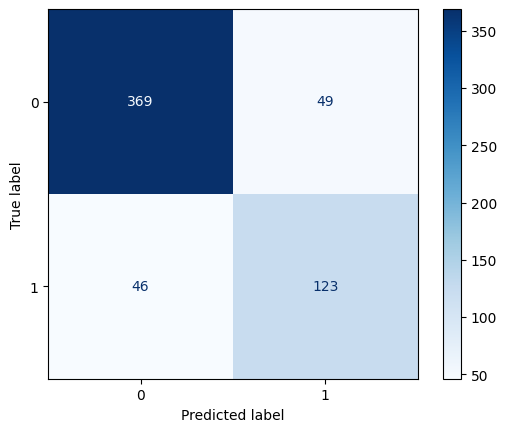

[[369  49]
 [ 46 123]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       418
           1       0.72      0.73      0.72       169

    accuracy                           0.84       587
   macro avg       0.80      0.81      0.80       587
weighted avg       0.84      0.84      0.84       587



In [57]:
# Crear el CountVectorizer, pasando las stopwords en español
stop_words = stopwords.words('spanish')
vectorizer = CountVectorizer(stop_words=stop_words)

# Ajustar el vectorizador en el conjunto de entrenamiento
bag_of_words_train = vectorizer.fit_transform(X_train)

# Transformar el conjunto de validación
bag_of_words_val = vectorizer.transform(X_val)

# Clasificación
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}
svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(
    estimator=svr,
    param_grid=parameters,
    n_jobs=8,
    scoring='f1_macro',
    cv=5
)
grid.fit(bag_of_words_train, y_train)

# Predicción
y_pred = grid.predict(bag_of_words_val)
p, r, f, _ = precision_recall_fscore_support(
    y_val,
    y_pred,
    average='macro'
)

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Evaluación del modelo
print(confusion_matrix(y_val, y_pred))
print(metrics.classification_report(y_val, y_pred))